# Assignement Module 1

## Sofia Davoli
### 813479


In [1]:
#import libraries

import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature

In [2]:
# set the filepath and load
shapefile = "./REGIONE_LOMBARDIA/Comuni_2012.shp"

#reading the file with geopandas
comuni = gpd.read_file(shapefile)

type(comuni) #geopandas.geodataframe.GeoDataFrame
comuni.head()

,CLASSREF,BELFIORE,COD_ISTAT,NOME_COM,COD_PRO,NOME_PRO,COD_CMO,NOME_CMO,COD_ASL,NOME_ASL,COD_REG,NOME_REG,SHAPE_AREA,SHAPE_LEN,geometry
0,1e9d907b-5ca6-413c-a9a9-323051719aa5,H870,03020056,SAN GIACOMO DELLE SEGNATE,20,MANTOVA,None,None,7,MANTOVA,03,LOMBARDIA,1.663635e+07,23465.214759,"POLYGON ((659751.409 4979669.500, 659733.431 4..."
1,505fc2d5-bb59-4147-ab77-5952916b071d,D204,03012060,CUNARDO,12,VARESE,ZO22,PIAMBELLO,14,VARESE,03,LOMBARDIA,5.895783e+06,11692.954186,"POLYGON ((483990.554 5088634.922, 483991.304 5..."
2,60f2e97e-585c-4386-b2b1-fd7f9d7814a3,A569,03017009,BAGNOLO MELLA,17,BRESCIA,None,None,2,BRESCIA,03,LOMBARDIA,3.128543e+07,28891.456939,"POLYGON ((594372.861 5033473.839, 594516.983 5..."
3,b4258bf7-aa93-4ded-8f23-76de750e4efc,D924,03017076,GARGNANO,17,BRESCIA,ZO02,ALTO GARDA BRESCIANO,2,BRESCIA,03,LOMBARDIA,7.647267e+07,43371.778984,"POLYGON ((634617.961 5062516.664, 633937.970 5..."
4,41a75e50-73bf-4a3e-85ec-673b6e213b2f,H410,03017162,ROCCAFRANCA,17,BRESCIA,None,None,2,BRESCIA,03,LOMBARDIA,1.954327e+07,30433.932676,"POLYGON ((574464.402 5033204.626, 574459.651 5..."


In [3]:
# What's the coordinate system of our data ?
comuni['geometry'].crs 

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### WGS 84 is the standard U.S. Department of Defense definition of a global reference system for geospatial information and is the reference system for the Global Positioning System (GPS).

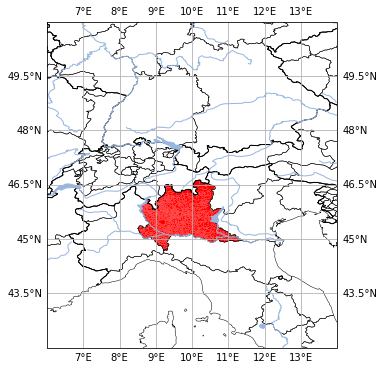

In [4]:
# Let's place Lombardy in a broader context
# Make a more elaborate plot >>> use matplotib & cartopy

fig = plt.figure(figsize=(9,6))  # x,y(inches)
plt.title('Lombardy region')

ax = plt.axes(projection=ccrs.PlateCarree()) #proiezione

#NB:3857: mercator, 32632: WG84
ax.add_geometries(comuni['geometry'], crs=ccrs.epsg('32632'), facecolor='red')


ax.set_xlim(6,14) 
ax.set_ylim(42,51) 

#add features
states = NaturalEarthFeature(category="cultural", scale="10m", facecolor="none", name="admin_1_states_provinces_shp")
ax.add_feature(states, linewidth=.5, edgecolor="black") #confini regionali
ax.add_feature(cfeature.BORDERS) #confini statali
ax.add_feature(cfeature.RIVERS) #fiumi
ax.add_feature(cfeature.LAKES) #laghi

ax.gridlines(draw_labels=True)

plt.show()

### Now let's merge information about population 

In [5]:
# First, import data about population
tab_pop = pd.read_csv('./REGIONE_LOMBARDIA/Lombardia_Pop2011_2014.csv',sep=',',encoding= 'unicode_escape')
tab_pop.head()


,Codice,Comune,Cod_prov,Provincia,Pop2011,Pop2014
0,3017064,CORZANO,17,BRESCIA,1358.0,1427.0
1,3017167,RUDIANO,17,BRESCIA,5861.0,5822.0
2,3017201,VILLANUOVA SUL CLISI,17,BRESCIA,5855.0,5778.0
3,3017084,IRMA,17,BRESCIA,152.0,128.0
4,3017102,MANERBA DEL GARDA,17,BRESCIA,4985.0,5290.0


In [6]:
# Then, let's join it with the geodatabase "comuni"
# In order to make a join, we need a common field: let that be the town code. 
# Let's rename it in the table so that the attribute names match
tab_pop.rename(columns={'Codice':'COD_ISTAT'}, inplace=True)
tab_pop.COD_ISTAT=tab_pop.COD_ISTAT.astype(int)
comuni.COD_ISTAT=comuni.COD_ISTAT.astype(int)
#Merge the 2 df
comuni = comuni.merge(tab_pop, on='COD_ISTAT')
type(comuni) #geopandas.geodataframe.GeoDataFram
comuni.crs #EPSG:32632
comuni.head()


,CLASSREF,BELFIORE,COD_ISTAT,NOME_COM,COD_PRO,NOME_PRO,COD_CMO,NOME_CMO,COD_ASL,NOME_ASL,COD_REG,NOME_REG,SHAPE_AREA,SHAPE_LEN,geometry,Comune,Cod_prov,Provincia,Pop2011,Pop2014
0,1e9d907b-5ca6-413c-a9a9-323051719aa5,H870,3020056,SAN GIACOMO DELLE SEGNATE,20,MANTOVA,None,None,7,MANTOVA,03,LOMBARDIA,1.663635e+07,23465.214759,"POLYGON ((659751.409 4979669.500, 659733.431 4...",SAN GIACOMO DELLE SEGNATE,20,MANTOVA,1774.0,1680.0
1,505fc2d5-bb59-4147-ab77-5952916b071d,D204,3012060,CUNARDO,12,VARESE,ZO22,PIAMBELLO,14,VARESE,03,LOMBARDIA,5.895783e+06,11692.954186,"POLYGON ((483990.554 5088634.922, 483991.304 5...",CUNARDO,12,VARESE,2939.0,2947.0
2,60f2e97e-585c-4386-b2b1-fd7f9d7814a3,A569,3017009,BAGNOLO MELLA,17,BRESCIA,None,None,2,BRESCIA,03,LOMBARDIA,3.128543e+07,28891.456939,"POLYGON ((594372.861 5033473.839, 594516.983 5...",BAGNOLO MELLA,17,BRESCIA,12969.0,12829.0
3,b4258bf7-aa93-4ded-8f23-76de750e4efc,D924,3017076,GARGNANO,17,BRESCIA,ZO02,ALTO GARDA BRESCIANO,2,BRESCIA,03,LOMBARDIA,7.647267e+07,43371.778984,"POLYGON ((634617.961 5062516.664, 633937.970 5...",GARGNANO,17,BRESCIA,3050.0,2937.0
4,41a75e50-73bf-4a3e-85ec-673b6e213b2f,H410,3017162,ROCCAFRANCA,17,BRESCIA,None,None,2,BRESCIA,03,LOMBARDIA,1.954327e+07,30433.932676,"POLYGON ((574464.402 5033204.626, 574459.651 5...",ROCCAFRANCA,17,BRESCIA,4819.0,4912.0


### Now focus on Milano province

In [7]:
milano = comuni[comuni.NOME_PRO=='MILANO']
milano_centroids = milano.geometry.centroid

In [8]:
#def df for plotting names of comuni
name=milano.NOME_COM.values
def getXY(pt):
    return (pt.x, pt.y)
x,y = [list(t) for t in zip(*map(getXY, milano_centroids))]
df = pd.DataFrame(name,columns =['Names']) 
df['x']=x
df['y']=y

df.loc[4,'Names']

'MESERO'

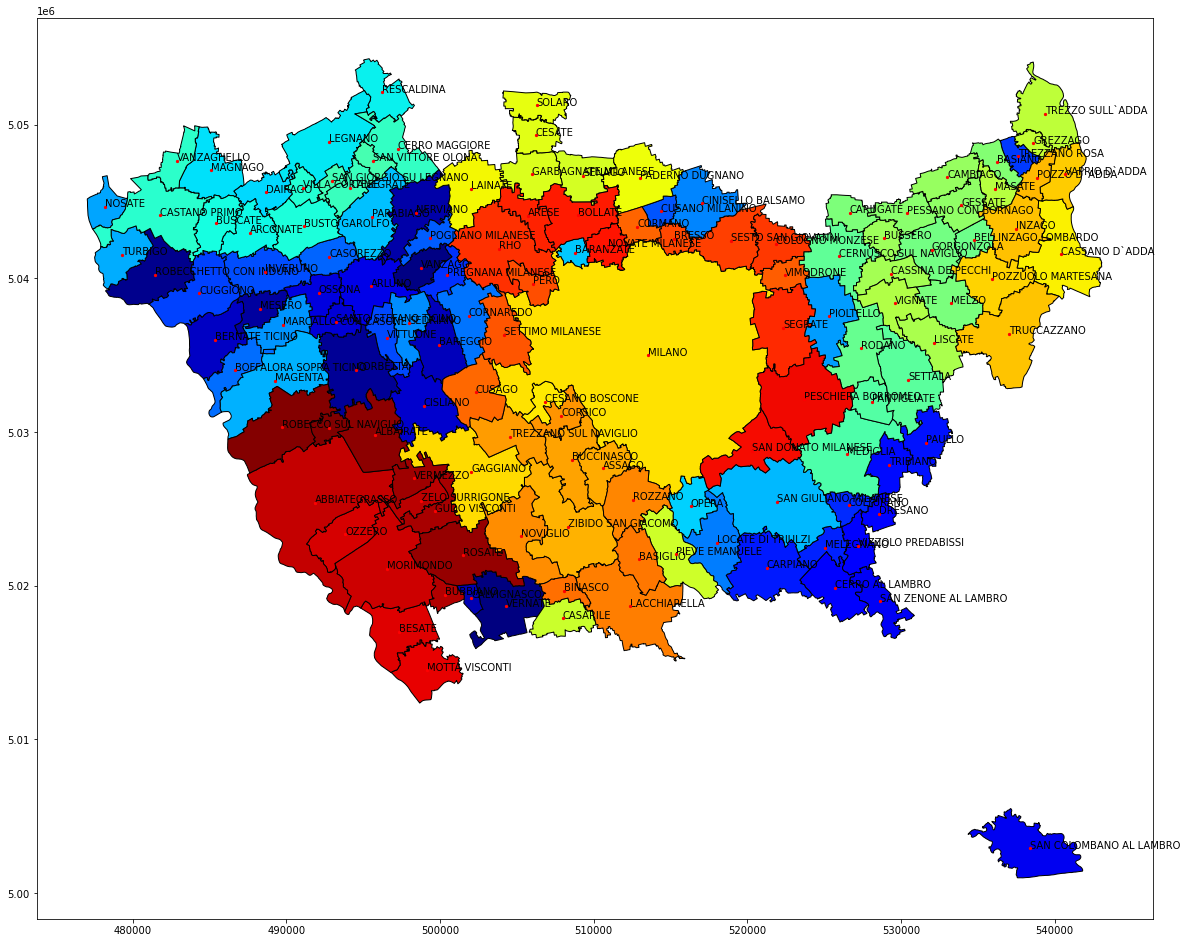

In [9]:
#print(df.loc[i, "Name"], df.loc[i, "Age"]) 

fig, ax = plt.subplots(figsize=(20,18))
milano.plot( ax=ax ,cmap='jet', edgecolor='black')
# Need to provide "zorder" to ensure the points are plotted above the polygons
milano_centroids.plot(ax=ax, markersize=5, color='r', zorder=10)
for el in range(0,133):
    ax.annotate(text=df.loc[el,'Names'], xy=(df.loc[el,'x'], df.loc[el,'y']))
plt.title=('COMUNE DI MILANO')
plt.show()

### Plot a map showing the density of population of the towns in the province of Milano, in 2011.


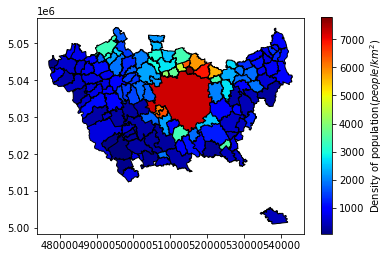

In [10]:

milano.plot( column=(milano['Pop2011'])/(milano['geometry'].area/1e6),edgecolors='black', cmap='jet', legend=True,legend_kwds={'label': 'Density of population($people/km^2$)'})
plt.title='Densità di popolazione del Comune di Milano 2011\n'
plt.show()